https://pandas.pydata.org/docs/user_guide/10min.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wt_import import Wt_Importer


Set file for analysis

In [2]:
wt_full_sample = 'C:\\Users\\count\\dev\\pandas\\data\\PA_sample_data.csv'
wt_short_sample = 'C:\\Users\\count\\dev\\pandas\\data\\PA_sample_data_short.csv'
wt_micro_sample = "C:\\Users\\count\\dev\\pandas\\data\\PA_micro.csv"

df = Wt_Importer(wt_full_sample).df

Begin working with the dataframe:
- take a subset of the columns
- take phase 1 voltage and total reactive power

In [3]:
df_cols_1_2 = df[['U-1-Total','Q-SigmaA-Total']]
df_VQ = df_cols_1_2.rename(columns= {"U-1-Total":"V1","Q-SigmaA-Total":"Q_total"})
# df_VQ.head(3)

Extract Voltage and Vars timeseries

In [4]:
vs = df_VQ['V1'].to_numpy(dtype=float, copy=True)   # Voltage Timeseries
vq = df_VQ['Q_total'].to_numpy(dtype=float, copy=True)   # Var Timeseries

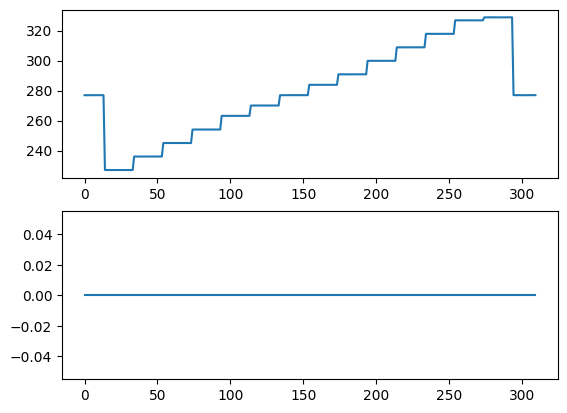

In [5]:

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.figsize=(16,2); ax2.figsize=(16,2)
ax1.plot(vs); ax2.plot(vq)

# Step finding
numpy.gradient() - keeping here for future cases where identifying edges of change `interval` is important

In [6]:
vgrad = np.gradient(vs)
# plt.figure(figsize=(16,2))
# plt.stem(vgrad[0:50])

numpy.diff()

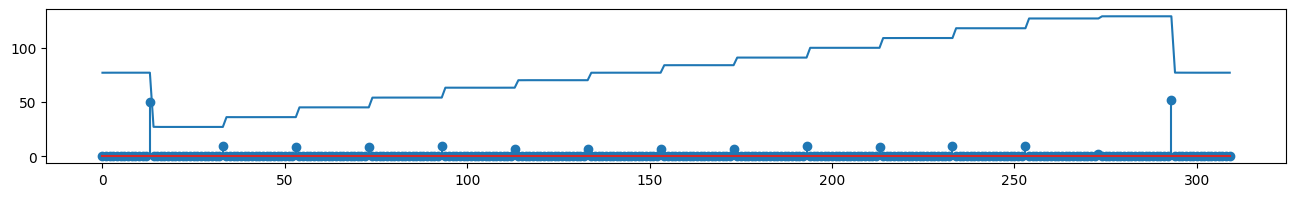

In [7]:
vdif = np.abs(np.diff(vs, append=vs[0] ))
plt.figure(figsize=(16,2))
plt.stem(vdif)
plt.plot(vs-200)
# plt.stem(vdif[0:20]) # first 20 samples of difference array

create binary array where steps are represented by boolean(1)

<StemContainer object of 3 artists>

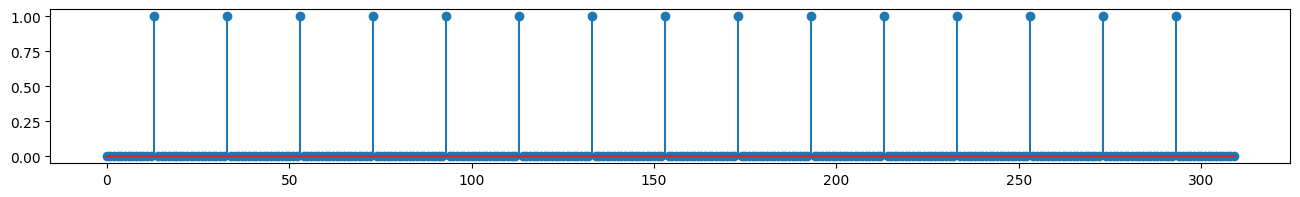

In [8]:
vbin = vdif > 1
plt.figure(figsize=(16,2))
plt.stem(vbin)

Get the index of each change point and plot change poits over original timeseries

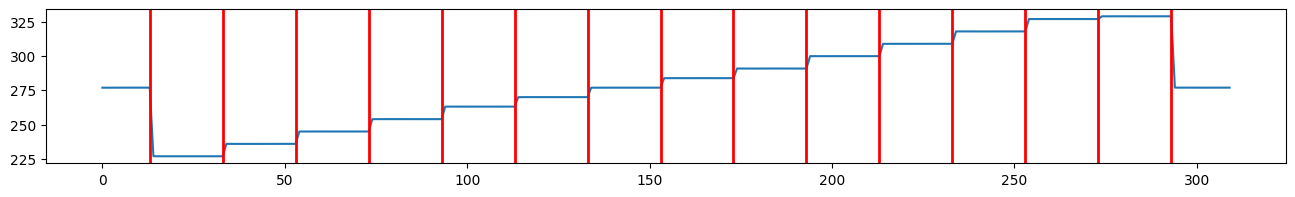

In [9]:
from Numpy_utils import plot_change_points 

change_points = np.where(vbin)[0]
plot_change_points(vs,change_points)

Get average value of each step in timeseries:
- define a window (as percent of step length) 
- place the uppermost window edge at uppermost edge of each interval defined by change locations 
- take the mean of the timeseries values in the window

In [10]:
from Numpy_utils import get_change_points
change_points

array([ 13,  33,  53,  73,  93, 113, 133, 153, 173, 193, 213, 233, 253,
       273, 293], dtype=int64)

In [11]:
from Numpy_utils import get_step_values
cp = get_change_points(vs)
v_idxs, v_vals = get_step_values(vs,cp)
q_idxs, q_vals = get_step_values(vq,cp)

<StemContainer object of 3 artists>

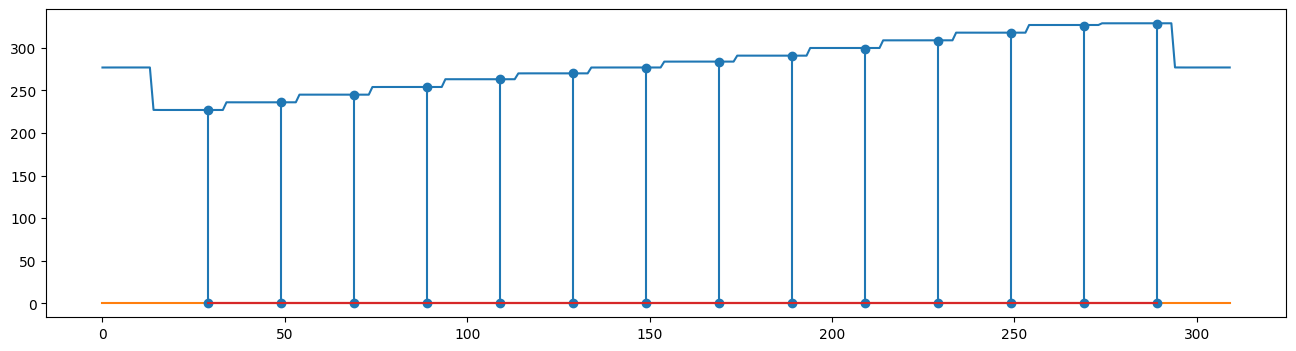

In [12]:
plt.figure(figsize=(16,4))
plt.plot(vs)
plt.stem(v_idxs,v_vals)
plt.plot(vq)
plt.stem(q_idxs,q_vals)

In [18]:
VQ = pd.DataFrame({'volt': v_vals,
                   'var': q_vals})
VQ.head(4)

,volt,var
0,227,0
1,236,0
2,245,0
3,254,0
